In [215]:
import matplotlib.pyplot as plt
import scipy
import sympy
import numpy as np
import control 
import os

# Task 1

In [216]:
def check_eigenvalues_controllable(A, B) -> np.array:
    assert len(A.shape) == 2
    assert A.shape[0] == A.shape[1]
    assert A.shape[0] == B.shape[0]
    
    n = A.shape[0]
    is_controllable = []

  
    eigen_values, _ = np.linalg.eig(A)
    for eigen_value in eigen_values:
        M = np.concatenate((A - eigen_value * np.eye(n), B.reshape(-1, 1)), axis=1)
        is_controllable.append(np.linalg.matrix_rank(M) == n)

    return np.array(is_controllable)

In [217]:
def get_observation_matrix(A, C):
    assert len(A.shape) == 2
    assert A.shape[0] == A.shape[1]
    assert A.shape[0] == C.shape[1]

    n = A.shape[0]
    U = np.zeros((0, n))
    for i in range(n):
        new_column = (C @ np.linalg.matrix_power(A, i))
        U = np.concatenate((U, new_column))

    return U
    

In [218]:
def check_system_observable(A, C, method = 'rank_criteria'):
    assert len(A.shape) == 2
    assert A.shape[0] == A.shape[1]
    assert A.shape[0] == C.shape[1]
    
    is_observable = None
    n = A.shape[0]
    if method == 'rank_criteria':
        V = get_observation_matrix(A, C)
        is_observable = np.linalg.matrix_rank(V) == n
    else:
        raise NotImplementedError
    
    return is_observable

In [219]:
def create_g_matrix(eigvalues):
    
    return np.diag(eigvalues)

In [220]:
def modeling(A, B, K):
    ss = control.ss((A + B @ K), B*0, A * 0, B * 0)

    time = np.linspace(0, 3, 1000)
    output = control.forced_response(ss, X0=[1, 1, 1, 1], T=time).states

    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)
    for i in range(4):
        axs[i//2, i % 2].plot(time, output[i], linewidth=4)
        # axs[i//2, i % 2].scatter(t[-1], x1[i], color='r', linewidth=4, label='goal')
        axs[i//2, i % 2].set_title(f'x_{i} = x_{i}(t)', fontsize=12)
        axs[i//2, i % 2].set_xlabel(f"t, [c]", fontsize=12)
        axs[i//2, i % 2].grid(True)
        axs[i//2, i % 2].legend()
        
        
    # axs[1, 1].plot(t, np.array(U).reshape(-1), linewidth=4)
    # axs[1, 1].set_title(f'u = u(t)', fontsize=12)
    # axs[1, 1].set_xlabel(f"t, [c]", fontsize=12)
    # axs[1, 1].grid(True)

In [221]:
A = np.array([
    [-5, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 2, 6],
    [0, 0, -6, 2],
])
B = np.array([
    [0],
    [1],
    [0],
    [3]
])

In [222]:
check_eigenvalues_controllable(A, B)

array([ True,  True, False,  True])

In [223]:
np.linalg.eig(A)[0]

array([ 2.+6.j,  2.-6.j, -5.+0.j,  0.+0.j])

In [224]:
desired_eigvalues = [-5, -5, -5, -5]
G = create_g_matrix(desired_eigvalues)
G[0, 1] = 1
G[1, 2] = 1
G[2, 3] = 1
G

array([[-5,  1,  0,  0],
       [ 0, -5,  1,  0],
       [ 0,  0, -5,  1],
       [ 0,  0,  0, -5]])

In [225]:
np.linalg.eig(G)[0]

array([-5., -5., -5., -5.])

In [226]:
Y = np.array([[1, 0, 0, 0]])

In [227]:
check_system_observable(G, Y)

True

In [228]:
P = scipy.linalg.solve_sylvester(A, -G, B@Y)
P

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.00000000e-01,  4.00000000e-02,  8.00000000e-03,
         1.60000000e-03],
       [-2.11764706e-01, -3.48788927e-02, -3.25340932e-03,
        -1.25515739e-04],
       [ 2.47058824e-01,  5.39792388e-03, -2.01750458e-03,
        -3.95799859e-04]])

In [229]:
K = -Y @ np.linalg.pinv(P)
K

array([[-1.51862216e-15, -2.92010346e+00, -4.15838815e+00,
        -5.24803873e+00]])

In [230]:
np.linalg.eig(A+B@K)[0]

array([-4.91860953+0.0732023j, -4.91860953-0.0732023j,
       -4.8270006 +0.j       , -5.        +0.j       ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


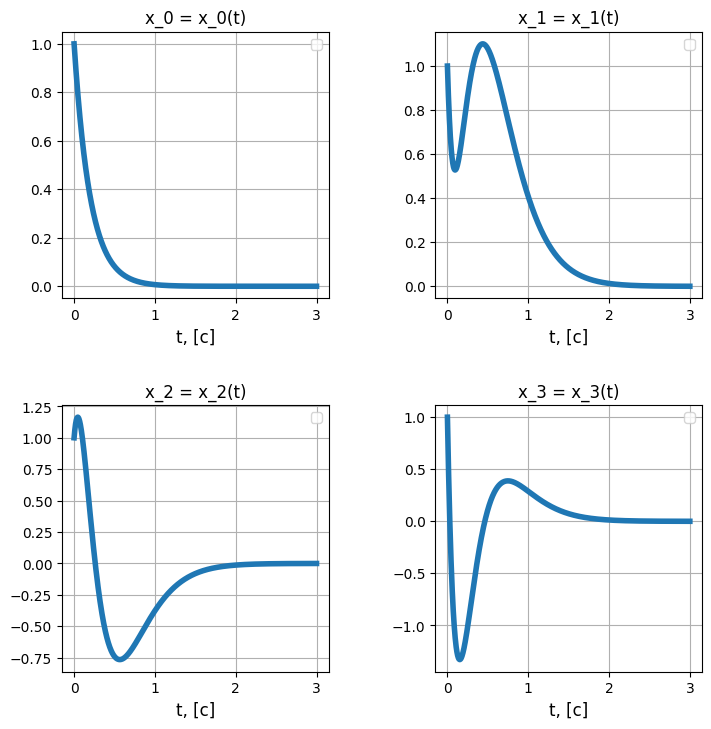

In [231]:
modeling(A, B, K)